In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/in-hospital-mortality-prediction/data01.csv


In [2]:
df = pd.read_csv('/kaggle/input/in-hospital-mortality-prediction/data01.csv')
df.head(2)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [4]:
# check missing entries
df.isna().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [6]:
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["heart rate"].fillna(df["heart rate"].mean(), inplace=True)
df["Systolic blood pressure"].fillna(df["Systolic blood pressure"].mean(), inplace=True)
df["Diastolic blood pressure"].fillna(df["Diastolic blood pressure"].mean(), inplace=True)
df["Respiratory rate"].fillna(df["Respiratory rate"].mean(), inplace=True)
df["temperature"].fillna(df["temperature"].mean(), inplace=True)
df["SP O2"].fillna(df["SP O2"].mean(), inplace=True)
df["Urine output"].fillna(df["Urine output"].mode()[0], inplace=True)
df["Neutrophils"].fillna(df["Neutrophils"].mean(), inplace=True)
df["Basophils"].fillna(df["Basophils"].mean(), inplace=True)
df["Lymphocyte"].fillna(df["Lymphocyte"].mean(), inplace=True)
df["PT"].fillna(df["PT"].mean(), inplace=True)
df["Creatine kinase"].fillna(df["Creatine kinase"].mean(), inplace=True)
df["glucose"].fillna(df["glucose"].mean(), inplace=True)
df["PH"].fillna(df["PH"].mean(), inplace=True)
df["Lactic acid"].fillna(df["Lactic acid"].mean(), inplace=True)
df["PCO2"].fillna(df["PCO2"].mean(), inplace=True)

In [7]:
df.isna().sum()

group                        0
ID                           0
outcome                      1
age                          0
gendera                      0
BMI                          0
hypertensive                 0
atrialfibrillation           0
CHD with no MI               0
diabetes                     0
deficiencyanemias            0
depression                   0
Hyperlipemia                 0
Renal failure                0
COPD                         0
heart rate                   0
Systolic blood pressure      0
Diastolic blood pressure     0
Respiratory rate             0
temperature                  0
SP O2                        0
Urine output                 0
hematocrit                   0
RBC                          0
MCH                          0
MCHC                         0
MCV                          0
RDW                          0
Leucocyte                    0
Platelets                    0
Neutrophils                  0
Basophils                    0
Lymphocy

In [8]:
# lets drop other NaN values
df.dropna(inplace=True)

In [9]:
df.isna().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [10]:
df.shape

(1155, 51)

In [11]:
df.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [13]:
# group is output
df.outcome.value_counts()

outcome
0.0    997
1.0    158
Name: count, dtype: int64

In [14]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [17]:
# delete id column
del df['ID']

In [20]:
# convert outcome to int
df.outcome = df.outcome.astype('int')

In [24]:
X = df.drop(columns=['outcome'])
X[:2]

,group,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
2,1,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35


In [25]:
y =  df.outcome
y[:2]

0    0
2    0
Name: outcome, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model1 = KNeighborsClassifier(n_neighbors=9)
model1.fit(X_train,y_train)
print(model1.score(X_train,y_train)*100)
print(model1.score(X_test,y_test)*100)

86.7965367965368
87.01298701298701


In [38]:
from sklearn.metrics import accuracy_score
accuracy = []
k_n = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    k_n.append(k)

In [39]:
accuracy

[0.7965367965367965,
 0.8701298701298701,
 0.8398268398268398,
 0.8658008658008658,
 0.8614718614718615,
 0.8614718614718615,
 0.8571428571428571,
 0.8658008658008658,
 0.8701298701298701,
 0.8744588744588745,
 0.8744588744588745,
 0.8701298701298701,
 0.8744588744588745,
 0.8701298701298701,
 0.8658008658008658,
 0.8701298701298701,
 0.8701298701298701,
 0.8701298701298701,
 0.8701298701298701,
 0.8701298701298701]

In [40]:
k_n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

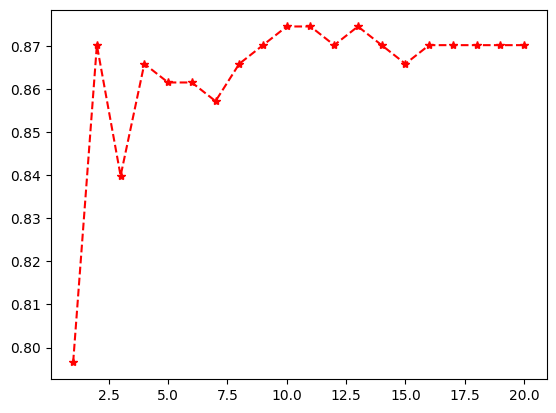

In [41]:
import matplotlib.pyplot as plt
plt.plot(k_n,accuracy,'--*r')

In [43]:
# put k=11 
model3 = KNeighborsClassifier(n_neighbors=11)
model3.fit(X_train,y_train)
model3.score(X_train,y_train)*100

86.25541125541125

In [44]:
# check accuracy for current data without scaling
y_pred = model3.predict(X_test)
accuracy_score(y_test,y_pred)*100

87.44588744588745

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
X_new = sc.fit_transform(X_train)

In [49]:
X_t = sc.transform(X_test)

In [50]:
# check score after scaling
model3.fit(X_new,y_train)
model3.score(X_new,y_train)*100

87.01298701298701

In [51]:
# check accuracy for current data without scaling

y_pred = model3.predict(X_t)
accuracy_score(y_test,y_pred)*100

87.44588744588745